## Definition

- is an algorithm for supervised learning of ANN using gradient descent.
- given an artificial neural network and an error function, the method calculates the gradient of the error function with respect to the neural network's weights.
- It is a generalization fo the delta rule for perceptrons to multilayer feedforward neural networks.

## Formal Definition

- Training a neural network with gradient descent requires the calculation of the gradient of the error function E(X,theta) with respect to the weight(w) and bias(b).Then according to the learning rate(step_size) each iteration of GD updates the w,b.

## Neural networks and back-propagation explained in a simple way

### step 1 - Model initialisation
- random initialisastion of the model is a common practice.The rational behind his that from wherever we start, if we are perseverant enough and through an iterative learning process, we can reach the pseudo-ideal model.

### step 2 - Foward propagate
- The natural step to do after initialising the model at random,
- is to check its performance. the calc flow is going in the natural forward direction from the input

### step 3 - Loss function
- In order to be able to generalise to any problem, we define what we call : loss function.
- several situations can lead to the same total sum of errors: for instance, lot of small errors or few big errors can sum up examtly to the same total amount of error.
- Since we would like the prediction to work upder any situation, it is more preferable to have a distribution of lot of small errors
    - That is why we use the 'sum of squares.'
- As a summary, the loss function is an error metric, that gves an indicator on how much precision we lose, if we replace the real desired output by the actual output generated by our trained neural network model

### step 4 - Differentiation
- Luckily for us, there is a powerful concept in mathematics that can guide us how to optimise the weights called differentiation. Basically it deals with the derivative of the loss function. In mathematics, the derivative of a function at a certain point, gives the rate or the speed of which this function is changing its values at this point.

### step 5 - Back-propagation
- derivative is decomposable, thus can be back-propagated.
- starting point of errors, which is the loss function, and we know how to derivate it. and if we know how to derivate each function from the composition, we can propagate back the error from the end to the start.

### step6 - Weight update
- general rule if weight updates is the delta rule : 
    - New weight = old weight — Derivative Rate * learning rate
- The learning rate is introduced as a constant (usually very small), in order to force the weight to get updated very smoothly and slowly (to avoid big steps and chaotic behaviour).
- above equation is 'steepest gradient descent'
- But since we cannot use (search) whole data, so we used to use fractional data by batch (mini-batch) , epochs , iteration

### step 7 - Iterate until convergence
- In neural network, after each iteration, the gradient descent force updates the weights towards less and less global loss function.
- The similarity is that the delta rule acts as a mutation operator, and the loss function acts a fitness function to minimise.

# Theano

In [3]:
import numpy as np
import matplotlib.pylab as plt

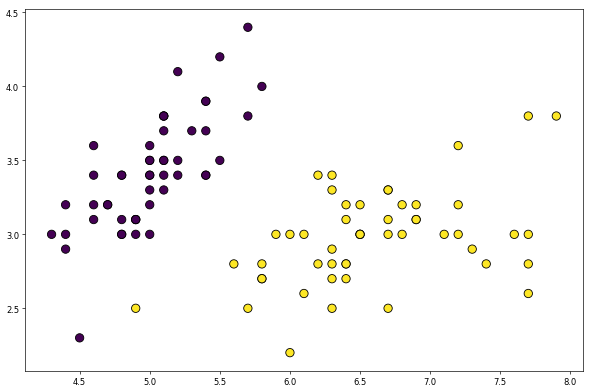

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] / 2

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

In [22]:
import theano
import theano.tensor as T
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.01 * np.random.randn(2), name="w")
b = theano.shared(0.01 * np.random.randn(1)[0], name="b")
z = T.dot(X, w) + b
logistic = 1/(1+T.exp(-z))
cost = T.sum((y - logistic)**2)

In [23]:
gw, gb = T.grad(cost, [w, b])
mu = 1e-2
train = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

In [31]:
for i in range(5000):
    cost_i = train(X_data, y_data)
    if i % 500 == 0:
        print("{:4d}: ".format(i), cost_i)


   0:  0.44293115612521866
 500:  0.4322430547008084
1000:  0.4223595074378015
1500:  0.4132015569581555
2000:  0.4046982120052886
2500:  0.3967858354854867
3000:  0.3894075050847629
3500:  0.3825123764988313
4000:  0.37605507008657496
4500:  0.36999509415970366


In [33]:
y_pred = T.round(logistic) # -1 ~ 1 => -1 또는 1 
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)


array([[50,  0],
       [ 0, 50]])

# Tensorflow

In [37]:
import tensorflow as tf
import warnings
warnings.simplefilter('ignore')

In [93]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = (iris.target[idx] /2 )[:, np.newaxis] # y=1 또는 y=-1. 2차원임을 명시

In [94]:
np.random.seed(0)
w = tf.Variable(1e-1 * np.random.randn(2, 1))
b = tf.Variable(1e-1 * np.random.randn(1)[0])
d = 1 / (1 + tf.exp(-(tf.matmul(X_data, w) + b)))

zero = np.zeros(1, dtype=np.float64)[0] # float64 자료형의 0 값 생성 
cost = tf.reduce_sum(tf.square(y_data - d))
optimizer = tf.train.GradientDescentOptimizer(1e-2)
                                             
train = optimizer.minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(5000):
    sess.run(train)
    if i % 100 == 0:
        print("{:4d}: ".format(i), sess.run(cost))

   0:  45.73533943509614
 100:  1.9927526898270729
 200:  1.6353207467467872
 300:  1.4441427850085313
 400:  1.3225725773815107
 500:  1.237135019087395
 600:  1.173012450239582
 700:  1.1225846318010366
 800:  1.0815110377055157
 900:  1.0471282156038777
1000:  1.0177063773884136
1100:  0.9920707201553273
1200:  0.9693939884475837
1300:  0.9490760269017469
1400:  0.930670420648098
1500:  0.9138379938122841
1600:  0.8983163156478415
1700:  0.8838991114154684
1800:  0.8704220031407591
1900:  0.8577524112879734
2000:  0.8457822603030354
2100:  0.8344226156246782
2200:  0.8235996776389989
2300:  0.813251745967509
2400:  0.8033268888268609
2500:  0.7937811322294211
2600:  0.7845770375938709
2700:  0.7756825731367254
2800:  0.7670702099936304
2900:  0.7587161920583987
3000:  0.7505999414223044
3100:  0.7427035706286368
3200:  0.7350114797903017
3300:  0.727510021674471
3400:  0.7201872216373815
3500:  0.7130325421433272
3600:  0.7060366837711503
3700:  0.6991914162759505
3800:  0.692489434

In [95]:
y_pred = sess.run(tf.round(d))

In [96]:
sess.close()

In [97]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 0, 50]])

# Keras

In [118]:
from sklearn.datasets import load_iris
iris = load_iris()
X , y = iris.data , iris.target

In [119]:
from sklearn.model_selection import train_test_split
train_X, test_X , train_y, test_y = train_test_split(X,y,\
                            test_size=0.4,random_state=0)

In [120]:
train_X.shape, train_y.shape , test_X.shape, test_y.shape

((90, 4), (90,), (60, 4), (60,))

In [121]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)

In [140]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(8, input_dim=4, activation="sigmoid"))
model.add(Dense(3, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.5), loss='mean_squared_error', metrics=["accuracy"])

In [141]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [142]:
%%time
hist = model.fit(train_X, train_y, 
                 epochs=1000, batch_size=100, 
                 validation_data=(test_X, test_y), 
                 verbose=2)

Train on 90 samples, validate on 60 samples
Epoch 1/1000
 - 0s - loss: 0.2613 - acc: 0.0000e+00 - val_loss: 0.2567 - val_acc: 0.0000e+00
Epoch 2/1000
 - 0s - loss: 0.2536 - acc: 0.0000e+00 - val_loss: 0.2505 - val_acc: 0.0000e+00
Epoch 3/1000
 - 0s - loss: 0.2474 - acc: 0.0000e+00 - val_loss: 0.2456 - val_acc: 0.0333
Epoch 4/1000
 - 0s - loss: 0.2424 - acc: 0.0000e+00 - val_loss: 0.2417 - val_acc: 0.0833
Epoch 5/1000
 - 0s - loss: 0.2385 - acc: 0.0778 - val_loss: 0.2387 - val_acc: 0.1500
Epoch 6/1000
 - 0s - loss: 0.2354 - acc: 0.2778 - val_loss: 0.2362 - val_acc: 0.2333
Epoch 7/1000
 - 0s - loss: 0.2330 - acc: 0.3333 - val_loss: 0.2342 - val_acc: 0.2667
Epoch 8/1000
 - 0s - loss: 0.2310 - acc: 0.3556 - val_loss: 0.2326 - val_acc: 0.2667
Epoch 9/1000
 - 0s - loss: 0.2293 - acc: 0.3667 - val_loss: 0.2312 - val_acc: 0.2667
Epoch 10/1000
 - 0s - loss: 0.2279 - acc: 0.3667 - val_loss: 0.2300 - val_acc: 0.2833
Epoch 11/1000
 - 0s - loss: 0.2266 - acc: 0.3778 - val_loss: 0.2289 - val_acc: 0.

Epoch 96/1000
 - 0s - loss: 0.1578 - acc: 0.7000 - val_loss: 0.1718 - val_acc: 0.6167
Epoch 97/1000
 - 0s - loss: 0.1571 - acc: 0.7000 - val_loss: 0.1712 - val_acc: 0.6167
Epoch 98/1000
 - 0s - loss: 0.1564 - acc: 0.7000 - val_loss: 0.1706 - val_acc: 0.6167
Epoch 99/1000
 - 0s - loss: 0.1558 - acc: 0.7000 - val_loss: 0.1700 - val_acc: 0.6167
Epoch 100/1000
 - 0s - loss: 0.1551 - acc: 0.7000 - val_loss: 0.1694 - val_acc: 0.6167
Epoch 101/1000
 - 0s - loss: 0.1545 - acc: 0.7000 - val_loss: 0.1688 - val_acc: 0.6167
Epoch 102/1000
 - 0s - loss: 0.1539 - acc: 0.7000 - val_loss: 0.1683 - val_acc: 0.6167
Epoch 103/1000
 - 0s - loss: 0.1532 - acc: 0.7000 - val_loss: 0.1677 - val_acc: 0.6167
Epoch 104/1000
 - 0s - loss: 0.1526 - acc: 0.7000 - val_loss: 0.1671 - val_acc: 0.6167
Epoch 105/1000
 - 0s - loss: 0.1520 - acc: 0.7000 - val_loss: 0.1666 - val_acc: 0.6167
Epoch 106/1000
 - 0s - loss: 0.1514 - acc: 0.7000 - val_loss: 0.1660 - val_acc: 0.6167
Epoch 107/1000
 - 0s - loss: 0.1508 - acc: 0.70

Epoch 191/1000
 - 0s - loss: 0.1155 - acc: 0.7111 - val_loss: 0.1331 - val_acc: 0.6167
Epoch 192/1000
 - 0s - loss: 0.1153 - acc: 0.7111 - val_loss: 0.1328 - val_acc: 0.6167
Epoch 193/1000
 - 0s - loss: 0.1150 - acc: 0.7111 - val_loss: 0.1326 - val_acc: 0.6167
Epoch 194/1000
 - 0s - loss: 0.1148 - acc: 0.7111 - val_loss: 0.1323 - val_acc: 0.6167
Epoch 195/1000
 - 0s - loss: 0.1145 - acc: 0.7111 - val_loss: 0.1321 - val_acc: 0.6167
Epoch 196/1000
 - 0s - loss: 0.1143 - acc: 0.7111 - val_loss: 0.1318 - val_acc: 0.6167
Epoch 197/1000
 - 0s - loss: 0.1140 - acc: 0.7111 - val_loss: 0.1316 - val_acc: 0.6167
Epoch 198/1000
 - 0s - loss: 0.1138 - acc: 0.7111 - val_loss: 0.1313 - val_acc: 0.6167
Epoch 199/1000
 - 0s - loss: 0.1135 - acc: 0.7111 - val_loss: 0.1311 - val_acc: 0.6167
Epoch 200/1000
 - 0s - loss: 0.1133 - acc: 0.7222 - val_loss: 0.1308 - val_acc: 0.6167
Epoch 201/1000
 - 0s - loss: 0.1131 - acc: 0.7222 - val_loss: 0.1306 - val_acc: 0.6167
Epoch 202/1000
 - 0s - loss: 0.1128 - acc: 

 - 0s - loss: 0.0975 - acc: 0.8889 - val_loss: 0.1146 - val_acc: 0.8333
Epoch 286/1000
 - 0s - loss: 0.0973 - acc: 0.8889 - val_loss: 0.1145 - val_acc: 0.8333
Epoch 287/1000
 - 0s - loss: 0.0972 - acc: 0.8889 - val_loss: 0.1143 - val_acc: 0.8333
Epoch 288/1000
 - 0s - loss: 0.0970 - acc: 0.8889 - val_loss: 0.1142 - val_acc: 0.8333
Epoch 289/1000
 - 0s - loss: 0.0968 - acc: 0.8889 - val_loss: 0.1140 - val_acc: 0.8333
Epoch 290/1000
 - 0s - loss: 0.0967 - acc: 0.8889 - val_loss: 0.1138 - val_acc: 0.8333
Epoch 291/1000
 - 0s - loss: 0.0965 - acc: 0.8889 - val_loss: 0.1137 - val_acc: 0.8333
Epoch 292/1000
 - 0s - loss: 0.0964 - acc: 0.8889 - val_loss: 0.1135 - val_acc: 0.8500
Epoch 293/1000
 - 0s - loss: 0.0962 - acc: 0.8889 - val_loss: 0.1133 - val_acc: 0.8500
Epoch 294/1000
 - 0s - loss: 0.0961 - acc: 0.8889 - val_loss: 0.1132 - val_acc: 0.8500
Epoch 295/1000
 - 0s - loss: 0.0959 - acc: 0.8889 - val_loss: 0.1130 - val_acc: 0.8500
Epoch 296/1000
 - 0s - loss: 0.0958 - acc: 0.8889 - val_lo

Epoch 380/1000
 - 0s - loss: 0.0834 - acc: 0.9556 - val_loss: 0.0999 - val_acc: 0.9333
Epoch 381/1000
 - 0s - loss: 0.0833 - acc: 0.9556 - val_loss: 0.0998 - val_acc: 0.9333
Epoch 382/1000
 - 0s - loss: 0.0831 - acc: 0.9556 - val_loss: 0.0996 - val_acc: 0.9333
Epoch 383/1000
 - 0s - loss: 0.0830 - acc: 0.9556 - val_loss: 0.0995 - val_acc: 0.9333
Epoch 384/1000
 - 0s - loss: 0.0829 - acc: 0.9556 - val_loss: 0.0993 - val_acc: 0.9500
Epoch 385/1000
 - 0s - loss: 0.0827 - acc: 0.9556 - val_loss: 0.0992 - val_acc: 0.9500
Epoch 386/1000
 - 0s - loss: 0.0826 - acc: 0.9556 - val_loss: 0.0990 - val_acc: 0.9500
Epoch 387/1000
 - 0s - loss: 0.0824 - acc: 0.9556 - val_loss: 0.0989 - val_acc: 0.9500
Epoch 388/1000
 - 0s - loss: 0.0823 - acc: 0.9556 - val_loss: 0.0987 - val_acc: 0.9500
Epoch 389/1000
 - 0s - loss: 0.0821 - acc: 0.9556 - val_loss: 0.0986 - val_acc: 0.9500
Epoch 390/1000
 - 0s - loss: 0.0820 - acc: 0.9556 - val_loss: 0.0984 - val_acc: 0.9500
Epoch 391/1000
 - 0s - loss: 0.0819 - acc: 

 - 0s - loss: 0.0706 - acc: 0.9667 - val_loss: 0.0862 - val_acc: 0.9500
Epoch 475/1000
 - 0s - loss: 0.0704 - acc: 0.9667 - val_loss: 0.0861 - val_acc: 0.9500
Epoch 476/1000
 - 0s - loss: 0.0703 - acc: 0.9667 - val_loss: 0.0859 - val_acc: 0.9500
Epoch 477/1000
 - 0s - loss: 0.0702 - acc: 0.9667 - val_loss: 0.0858 - val_acc: 0.9500
Epoch 478/1000
 - 0s - loss: 0.0700 - acc: 0.9667 - val_loss: 0.0857 - val_acc: 0.9500
Epoch 479/1000
 - 0s - loss: 0.0699 - acc: 0.9667 - val_loss: 0.0855 - val_acc: 0.9500
Epoch 480/1000
 - 0s - loss: 0.0698 - acc: 0.9667 - val_loss: 0.0854 - val_acc: 0.9500
Epoch 481/1000
 - 0s - loss: 0.0697 - acc: 0.9667 - val_loss: 0.0852 - val_acc: 0.9500
Epoch 482/1000
 - 0s - loss: 0.0695 - acc: 0.9667 - val_loss: 0.0851 - val_acc: 0.9500
Epoch 483/1000
 - 0s - loss: 0.0694 - acc: 0.9667 - val_loss: 0.0850 - val_acc: 0.9500
Epoch 484/1000
 - 0s - loss: 0.0693 - acc: 0.9667 - val_loss: 0.0848 - val_acc: 0.9500
Epoch 485/1000
 - 0s - loss: 0.0691 - acc: 0.9667 - val_lo

Epoch 569/1000
 - 0s - loss: 0.0590 - acc: 0.9778 - val_loss: 0.0738 - val_acc: 0.9667
Epoch 570/1000
 - 0s - loss: 0.0589 - acc: 0.9778 - val_loss: 0.0736 - val_acc: 0.9667
Epoch 571/1000
 - 0s - loss: 0.0587 - acc: 0.9778 - val_loss: 0.0735 - val_acc: 0.9667
Epoch 572/1000
 - 0s - loss: 0.0586 - acc: 0.9778 - val_loss: 0.0734 - val_acc: 0.9667
Epoch 573/1000
 - 0s - loss: 0.0585 - acc: 0.9778 - val_loss: 0.0733 - val_acc: 0.9667
Epoch 574/1000
 - 0s - loss: 0.0584 - acc: 0.9778 - val_loss: 0.0732 - val_acc: 0.9667
Epoch 575/1000
 - 0s - loss: 0.0583 - acc: 0.9778 - val_loss: 0.0730 - val_acc: 0.9667
Epoch 576/1000
 - 0s - loss: 0.0582 - acc: 0.9778 - val_loss: 0.0729 - val_acc: 0.9667
Epoch 577/1000
 - 0s - loss: 0.0581 - acc: 0.9778 - val_loss: 0.0728 - val_acc: 0.9667
Epoch 578/1000
 - 0s - loss: 0.0580 - acc: 0.9778 - val_loss: 0.0727 - val_acc: 0.9667
Epoch 579/1000
 - 0s - loss: 0.0579 - acc: 0.9778 - val_loss: 0.0726 - val_acc: 0.9667
Epoch 580/1000
 - 0s - loss: 0.0577 - acc: 

 - 0s - loss: 0.0494 - acc: 0.9778 - val_loss: 0.0635 - val_acc: 0.9667
Epoch 664/1000
 - 0s - loss: 0.0493 - acc: 0.9778 - val_loss: 0.0634 - val_acc: 0.9667
Epoch 665/1000
 - 0s - loss: 0.0493 - acc: 0.9778 - val_loss: 0.0633 - val_acc: 0.9667
Epoch 666/1000
 - 0s - loss: 0.0492 - acc: 0.9778 - val_loss: 0.0632 - val_acc: 0.9667
Epoch 667/1000
 - 0s - loss: 0.0491 - acc: 0.9778 - val_loss: 0.0631 - val_acc: 0.9667
Epoch 668/1000
 - 0s - loss: 0.0490 - acc: 0.9778 - val_loss: 0.0630 - val_acc: 0.9667
Epoch 669/1000
 - 0s - loss: 0.0489 - acc: 0.9778 - val_loss: 0.0629 - val_acc: 0.9667
Epoch 670/1000
 - 0s - loss: 0.0488 - acc: 0.9778 - val_loss: 0.0628 - val_acc: 0.9667
Epoch 671/1000
 - 0s - loss: 0.0487 - acc: 0.9778 - val_loss: 0.0627 - val_acc: 0.9667
Epoch 672/1000
 - 0s - loss: 0.0486 - acc: 0.9778 - val_loss: 0.0626 - val_acc: 0.9667
Epoch 673/1000
 - 0s - loss: 0.0485 - acc: 0.9778 - val_loss: 0.0625 - val_acc: 0.9667
Epoch 674/1000
 - 0s - loss: 0.0484 - acc: 0.9778 - val_lo

Epoch 758/1000
 - 0s - loss: 0.0418 - acc: 0.9778 - val_loss: 0.0552 - val_acc: 0.9667
Epoch 759/1000
 - 0s - loss: 0.0418 - acc: 0.9778 - val_loss: 0.0552 - val_acc: 0.9667
Epoch 760/1000
 - 0s - loss: 0.0417 - acc: 0.9778 - val_loss: 0.0551 - val_acc: 0.9667
Epoch 761/1000
 - 0s - loss: 0.0416 - acc: 0.9778 - val_loss: 0.0550 - val_acc: 0.9667
Epoch 762/1000
 - 0s - loss: 0.0415 - acc: 0.9778 - val_loss: 0.0549 - val_acc: 0.9667
Epoch 763/1000
 - 0s - loss: 0.0415 - acc: 0.9778 - val_loss: 0.0548 - val_acc: 0.9667
Epoch 764/1000
 - 0s - loss: 0.0414 - acc: 0.9778 - val_loss: 0.0548 - val_acc: 0.9667
Epoch 765/1000
 - 0s - loss: 0.0413 - acc: 0.9778 - val_loss: 0.0547 - val_acc: 0.9667
Epoch 766/1000
 - 0s - loss: 0.0413 - acc: 0.9778 - val_loss: 0.0546 - val_acc: 0.9667
Epoch 767/1000
 - 0s - loss: 0.0412 - acc: 0.9778 - val_loss: 0.0546 - val_acc: 0.9667
Epoch 768/1000
 - 0s - loss: 0.0411 - acc: 0.9778 - val_loss: 0.0545 - val_acc: 0.9667
Epoch 769/1000
 - 0s - loss: 0.0411 - acc: 

 - 0s - loss: 0.0360 - acc: 0.9778 - val_loss: 0.0489 - val_acc: 0.9667
Epoch 853/1000
 - 0s - loss: 0.0360 - acc: 0.9778 - val_loss: 0.0489 - val_acc: 0.9667
Epoch 854/1000
 - 0s - loss: 0.0359 - acc: 0.9778 - val_loss: 0.0488 - val_acc: 0.9667
Epoch 855/1000
 - 0s - loss: 0.0359 - acc: 0.9778 - val_loss: 0.0488 - val_acc: 0.9667
Epoch 856/1000
 - 0s - loss: 0.0358 - acc: 0.9778 - val_loss: 0.0487 - val_acc: 0.9667
Epoch 857/1000
 - 0s - loss: 0.0358 - acc: 0.9778 - val_loss: 0.0487 - val_acc: 0.9667
Epoch 858/1000
 - 0s - loss: 0.0357 - acc: 0.9778 - val_loss: 0.0486 - val_acc: 0.9667
Epoch 859/1000
 - 0s - loss: 0.0357 - acc: 0.9778 - val_loss: 0.0485 - val_acc: 0.9667
Epoch 860/1000
 - 0s - loss: 0.0356 - acc: 0.9778 - val_loss: 0.0485 - val_acc: 0.9667
Epoch 861/1000
 - 0s - loss: 0.0356 - acc: 0.9778 - val_loss: 0.0484 - val_acc: 0.9667
Epoch 862/1000
 - 0s - loss: 0.0355 - acc: 0.9778 - val_loss: 0.0484 - val_acc: 0.9667
Epoch 863/1000
 - 0s - loss: 0.0355 - acc: 0.9778 - val_lo

Epoch 947/1000
 - 0s - loss: 0.0316 - acc: 0.9778 - val_loss: 0.0441 - val_acc: 0.9667
Epoch 948/1000
 - 0s - loss: 0.0315 - acc: 0.9778 - val_loss: 0.0440 - val_acc: 0.9667
Epoch 949/1000
 - 0s - loss: 0.0315 - acc: 0.9778 - val_loss: 0.0440 - val_acc: 0.9667
Epoch 950/1000
 - 0s - loss: 0.0314 - acc: 0.9778 - val_loss: 0.0440 - val_acc: 0.9667
Epoch 951/1000
 - 0s - loss: 0.0314 - acc: 0.9778 - val_loss: 0.0439 - val_acc: 0.9667
Epoch 952/1000
 - 0s - loss: 0.0313 - acc: 0.9778 - val_loss: 0.0439 - val_acc: 0.9667
Epoch 953/1000
 - 0s - loss: 0.0313 - acc: 0.9778 - val_loss: 0.0438 - val_acc: 0.9667
Epoch 954/1000
 - 0s - loss: 0.0313 - acc: 0.9778 - val_loss: 0.0438 - val_acc: 0.9667
Epoch 955/1000
 - 0s - loss: 0.0312 - acc: 0.9778 - val_loss: 0.0437 - val_acc: 0.9667
Epoch 956/1000
 - 0s - loss: 0.0312 - acc: 0.9778 - val_loss: 0.0437 - val_acc: 0.9667
Epoch 957/1000
 - 0s - loss: 0.0311 - acc: 0.9778 - val_loss: 0.0437 - val_acc: 0.9667
Epoch 958/1000
 - 0s - loss: 0.0311 - acc: 

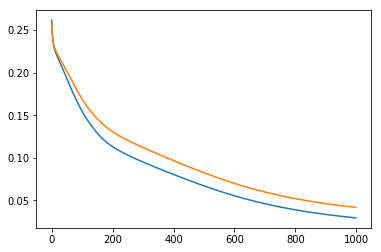

In [143]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

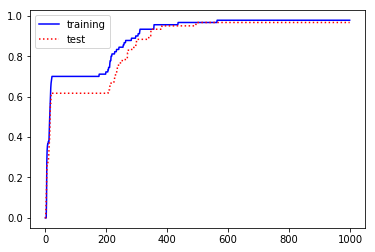

In [144]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [146]:
predictions = model.predict(train_X)

In [147]:
y_pred = lb.inverse_transform(np.round(predictions))

In [148]:
y_true = lb.inverse_transform(train_y)

In [149]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(y_true,y_pred)

array([[34,  0,  0],
       [ 0, 25,  2],
       [ 0,  0, 29]])

In [150]:
accuracy_score(y_true,y_pred)

0.9777777777777777